In [195]:
import numpy as np
import pandas as pd
import json
from SPARQLWrapper import SPARQLWrapper, JSON
from pandas import DataFrame

In [196]:
wds = "https://query.wikidata.org/sparql" 

In [197]:
sparql = SPARQLWrapper("https://query.wikidata.org/sparql", 
            agent="Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11")

In [198]:
def get_sparql_dataframe(service, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    sparql = SPARQLWrapper(service,  agent="Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11")
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

In [199]:
rq = """
SELECT  ?person ?personLabel ?causeLabel ?occupLabel ?date ?bdate
WHERE
{
  ?person wdt:P27 wd:Q668 .
  OPTIONAL {?person wdt:P106 ?occup .}
  OPTIONAL {?person wdt:P569 ?bdate .}
  OPTIONAL {?person wdt:P509 ?cause .}
  ?person wdt:P31 wd:Q5;
      
          p:P570/psv:P570 [
                wikibase:timePrecision ?precision ;
                wikibase:timeValue ?date ;
              ] .
 
  FILTER( ?date >= "2000-01-01T00:00:00"^^xsd:dateTime )
  FILTER( ?precision >= "10"^^xsd:integer ) # precision of at least month
  
  SERVICE wikibase:label  {bd:serviceParam wikibase:language "en" . }
}
"""

In [200]:
df = get_sparql_dataframe(wds, rq)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8409 entries, 0 to 8408
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   person       8409 non-null   object
 1   personLabel  8409 non-null   object
 2   causeLabel   1737 non-null   object
 3   occupLabel   8155 non-null   object
 4   date         8409 non-null   object
 5   bdate        8187 non-null   object
dtypes: object(6)
memory usage: 394.3+ KB


In [202]:
df.head()

,person,personLabel,causeLabel,occupLabel,date,bdate
0,http://www.wikidata.org/entity/Q55713,Anand Yadav,None,writer,2016-11-27T00:00:00Z,1935-01-01T00:00:00Z
1,http://www.wikidata.org/entity/Q55713,Anand Yadav,None,author,2016-11-27T00:00:00Z,1935-01-01T00:00:00Z
2,http://www.wikidata.org/entity/Q55713,Anand Yadav,None,autobiographer,2016-11-27T00:00:00Z,1935-01-01T00:00:00Z
3,http://www.wikidata.org/entity/Q55713,Anand Yadav,None,writer,2016-11-27T00:00:00Z,1935-11-30T00:00:00Z
4,http://www.wikidata.org/entity/Q55713,Anand Yadav,None,author,2016-11-27T00:00:00Z,1935-11-30T00:00:00Z


In [203]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M:%SZ')

In [204]:
df['bdate'] =  pd.to_datetime(df['bdate'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8409 entries, 0 to 8408
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   person       8409 non-null   object        
 1   personLabel  8409 non-null   object        
 2   causeLabel   1737 non-null   object        
 3   occupLabel   8155 non-null   object        
 4   date         8409 non-null   datetime64[ns]
 5   bdate        8184 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 394.3+ KB


In [206]:
df['age'] = (df['date'] - df['bdate'])/np.timedelta64(1,'Y')

In [207]:
df.head()

,person,personLabel,causeLabel,occupLabel,date,bdate,age
0,http://www.wikidata.org/entity/Q55713,Anand Yadav,None,writer,2016-11-27,1935-01-01,81.907226
1,http://www.wikidata.org/entity/Q55713,Anand Yadav,None,author,2016-11-27,1935-01-01,81.907226
2,http://www.wikidata.org/entity/Q55713,Anand Yadav,None,autobiographer,2016-11-27,1935-01-01,81.907226
3,http://www.wikidata.org/entity/Q55713,Anand Yadav,None,writer,2016-11-27,1935-11-30,80.995503
4,http://www.wikidata.org/entity/Q55713,Anand Yadav,None,author,2016-11-27,1935-11-30,80.995503


In [208]:
df['dyear'] = pd.DatetimeIndex(df['date']).year
df['dmonth'] = pd.DatetimeIndex(df['date']).month

In [209]:
df.head()

,person,personLabel,causeLabel,occupLabel,date,bdate,age,dyear,dmonth
0,http://www.wikidata.org/entity/Q55713,Anand Yadav,None,writer,2016-11-27,1935-01-01,81.907226,2016,11
1,http://www.wikidata.org/entity/Q55713,Anand Yadav,None,author,2016-11-27,1935-01-01,81.907226,2016,11
2,http://www.wikidata.org/entity/Q55713,Anand Yadav,None,autobiographer,2016-11-27,1935-01-01,81.907226,2016,11
3,http://www.wikidata.org/entity/Q55713,Anand Yadav,None,writer,2016-11-27,1935-11-30,80.995503,2016,11
4,http://www.wikidata.org/entity/Q55713,Anand Yadav,None,author,2016-11-27,1935-11-30,80.995503,2016,11


In [210]:
df[df['dmonth'] < 8].groupby('dyear').person.nunique()

dyear
2000     86
2001     99
2002    100
2003     81
2004     90
2005     94
2006    111
2007    119
2008    118
2009    131
2010    160
2011    157
2012    144
2013    204
2014    178
2015    199
2016    196
2017    172
2018    194
2019    201
2020    277
Name: person, dtype: int64

In [211]:
df_death = DataFrame({'deaths' : df[df['dmonth'] < 8].groupby('dyear').person.nunique()}).reset_index()

In [212]:
df_death
df_death['dyear'] = pd.to_datetime(df_death['dyear'], format='%Y')
df_death.index = pd.Index(sm.tsa.datetools.dates_from_range('2000', '2020'))

In [213]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
from statsmodels.tsa.stattools import acf

In [214]:
# Create Training and Test
train = df_death.deaths[:19]
test = df_death.deaths[19:]

C:\Users\suvad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\suvad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


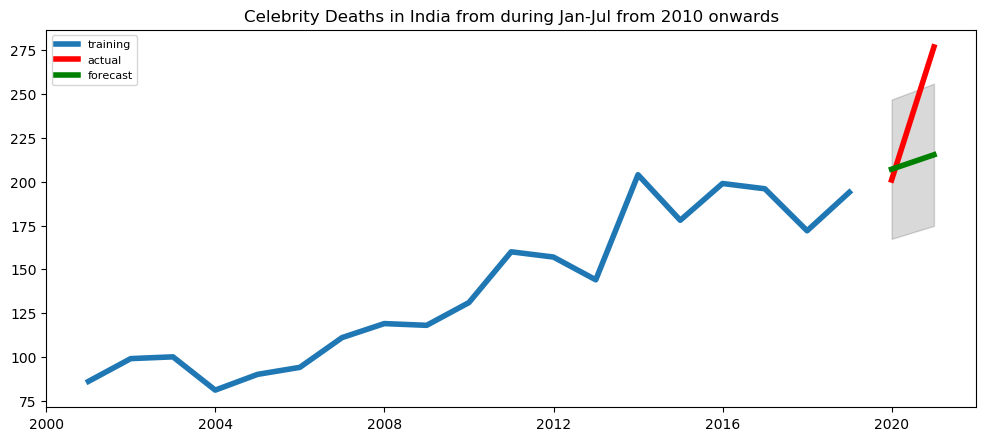

In [215]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(2, alpha=0.01)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training', linewidth=4)
plt.plot(test, label='actual', linewidth=4, color='red')
plt.plot(fc_series, label='forecast', linewidth=4, color='green')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Celebrity Deaths in India from during Jan-Jul from 2010 onwards')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [216]:
lower_series

2019-12-31    167.389926
2020-12-31    174.822657
dtype: float64

In [218]:
upper_series

2019-12-31    246.943419
2020-12-31    256.013736
dtype: float64

In [181]:
rq = """
SELECT  ?person ?personLabel ?causeLabel ?occupLabel ?date ?bdate
WHERE
{
  ?person wdt:P27 wd:Q145 .
  OPTIONAL {?person wdt:P106 ?occup .}
  OPTIONAL {?person wdt:P569 ?bdate .}
  OPTIONAL {?person wdt:P509 ?cause .}
  ?person wdt:P31 wd:Q5;
      
          p:P570/psv:P570 [
                wikibase:timePrecision ?precision ;
                wikibase:timeValue ?date ;
              ] .
 
  FILTER( ?date >= "2000-01-01T00:00:00"^^xsd:dateTime )
  FILTER( ?precision >= "10"^^xsd:integer ) # precision of at least month
  
  SERVICE wikibase:label  {bd:serviceParam wikibase:language "en" . }
}
"""

In [182]:
df = get_sparql_dataframe(wds, rq)

In [186]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M:%SZ')
df['bdate'] =  pd.to_datetime(df['bdate'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
df['age'] = (df['date'] - df['bdate'])/np.timedelta64(1,'Y')
df['dyear'] = pd.DatetimeIndex(df['date']).year
df['dmonth'] = pd.DatetimeIndex(df['date']).month
df[df['dmonth'] < 8].groupby('dyear').person.nunique()
df_death = DataFrame({'deaths' : df[df['dmonth'] < 8].groupby('dyear').person.nunique()}).reset_index()
df_death['dyear'] = pd.to_datetime(df_death['dyear'], format='%Y')
df_death

,dyear,deaths
0,2000-01-01,344
1,2001-01-01,361
2,2002-01-01,345
3,2003-01-01,387
4,2004-01-01,430
5,2005-01-01,368
6,2006-01-01,410
7,2007-01-01,405
8,2008-01-01,456
9,2009-01-01,490


In [190]:
rq = """
SELECT  ?person ?personLabel  ?date 
WHERE
{
  ?person wdt:P27 wd:Q30 .
  ?person wdt:P31 wd:Q5;
      
          p:P570/psv:P570 [
                wikibase:timePrecision ?precision ;
                wikibase:timeValue ?date ;
              ] .
 
  FILTER( ?date >= "2000-01-01T00:00:00"^^xsd:dateTime )
  FILTER( ?precision >= "10"^^xsd:integer ) # precision of at least month
  
  SERVICE wikibase:label  {bd:serviceParam wikibase:language "en" . }
}
"""

In [191]:
df = get_sparql_dataframe(wds, rq)

In [192]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M:%SZ')
df['dyear'] = pd.DatetimeIndex(df['date']).year
df['dmonth'] = pd.DatetimeIndex(df['date']).month
df[df['dmonth'] < 8].groupby('dyear').person.nunique()
df_death = DataFrame({'deaths' : df[df['dmonth'] < 8].groupby('dyear').person.nunique()}).reset_index()
df_death['dyear'] = pd.to_datetime(df_death['dyear'], format='%Y')
df_death

,dyear,deaths
0,2000-01-01,1055
1,2001-01-01,1013
2,2002-01-01,1178
3,2003-01-01,1191
4,2004-01-01,1106
5,2005-01-01,1247
6,2006-01-01,1337
7,2007-01-01,1454
8,2008-01-01,1395
9,2009-01-01,1453
